In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import sklearn
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
import os
from google.colab import drive

# Mount google drive
DRIVE_MOUNT='/content/gdrive'
drive.mount(DRIVE_MOUNT)

# create folder to write data to
CIS545_FOLDER=os.path.join(DRIVE_MOUNT, 'My Drive', 'FYP', 'report', 'ALL', 'traditional ML methods', 'd5')
HOMEWORK_FOLDER=os.path.join(CIS545_FOLDER, 'Project')
os.makedirs(HOMEWORK_FOLDER, exist_ok=True)

Mounted at /content/gdrive


In [3]:
x_train = pd.read_csv('/content/gdrive/My Drive/FYP/report/ALL/traditional ML methods/d5/Project/training_data.csv')
x_test = pd.read_csv('/content/gdrive/My Drive/FYP/report/ALL/traditional ML methods/d5/Project/testing_data.csv')
y_train = pd.read_csv('/content/gdrive/My Drive/FYP/report/ALL/traditional ML methods/d5/Project/train_labels.csv')
y_test = pd.read_csv('/content/gdrive/My Drive/FYP/report/ALL/traditional ML methods/d5/Project/test_labels.csv')

In [4]:
x_train.drop(columns=['Unnamed: 0'], inplace = True)
x_test.drop(columns=['Unnamed: 0'], inplace = True)
y_train.drop(columns=['Unnamed: 0'], inplace = True)
y_test.drop(columns=['Unnamed: 0'], inplace = True)

In [5]:
fake = pd.read_csv('/content/gdrive/My Drive/FYP/report/ALL/traditional ML methods/d5/Project/fakeForModeling.csv')
true = pd.read_csv('/content/gdrive/My Drive/FYP/report/ALL/traditional ML methods/d5/Project/trueForModeling.csv')

In [6]:
fake.drop(columns=['Unnamed: 0'], inplace = True)
true.drop(columns=['Unnamed: 0'], inplace = True)

Binomial Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

# 2. instantiate a logistic regression model
lr = LogisticRegression()

lr.fit(x_train, np.ravel(y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
y_pred_lr = lr.predict(x_test)

In [9]:
print ("Accuracy is: ", metrics.accuracy_score(y_test, y_pred_lr))
print("Mean Squared Error is:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Accuracy is:  0.8652561247216035
Mean Squared Error is: 0.36707475434629994


In [10]:
lr_cm = metrics.confusion_matrix(y_test, y_pred_lr)
print (lr_cm)

[[3706  596]
 [ 614 4064]]


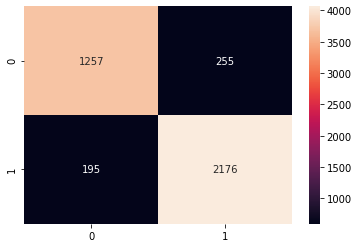

In [11]:
labels = np.array([['1257','255'],['195','2176']])
sns.heatmap(lr_cm, annot=labels, fmt = '')
plt.show()

In [12]:
print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4302
           1       0.87      0.87      0.87      4678

    accuracy                           0.87      8980
   macro avg       0.86      0.87      0.87      8980
weighted avg       0.87      0.87      0.87      8980



In [13]:
# Calculate predicted probabilities for test data 
y_pred_prob_lr = lr.predict_proba(x_test)[:, 1]

In [14]:
metrics.roc_auc_score(y_test, y_pred_prob_lr)

0.9341136359615988